Loading MNIST dataset...
Filtered dataset shape: (14780, 784)
Classes in dataset: [0 1]


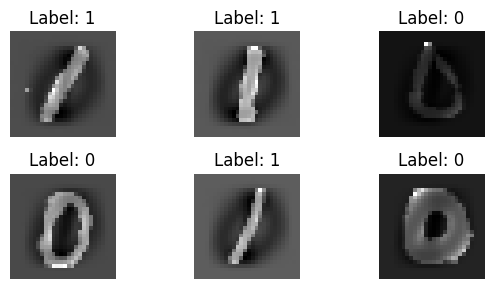


Test Accuracy: 99.93%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1402
           1       1.00      1.00      1.00      1554

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



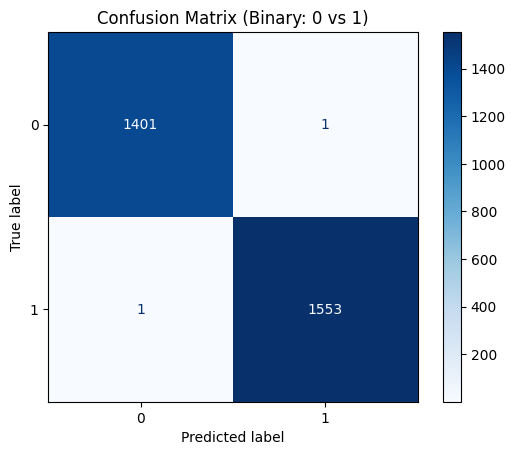

Number of misclassified samples: 2


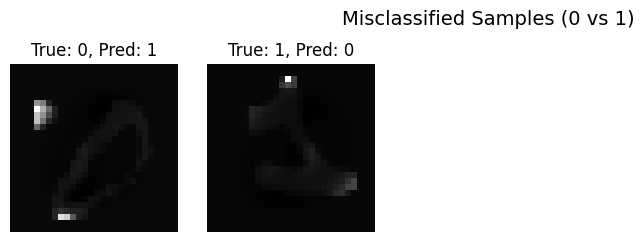

In [2]:
# -------------------------------------------------------------
# MNIST Binary Classification (Digits 0 and 1) using scikit-learn
# -------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X = mnist.data
y = mnist.target.astype('int')

# Step 2: Filter only digits 0 and 1
mask = (y == 0) | (y == 1)
X, y = X[mask], y[mask]

print("Filtered dataset shape:", X.shape)
print("Classes in dataset:", np.unique(y))

# Step 3: Normalize and scale
X = X / 255.0
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Visualize some training samples
plt.figure(figsize=(6, 3))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 6: Train logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Step 7: Predict on test data
y_pred = model.predict(X_test)

# Step 8: Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc * 100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Binary: 0 vs 1)")
plt.show()

# Step 10: Display wrongly predicted samples
misclassified_idx = np.where(y_pred != y_test)[0]

print(f"Number of misclassified samples: {len(misclassified_idx)}")

if len(misclassified_idx) > 0:
    plt.figure(figsize=(10, 4))
    for i, idx in enumerate(misclassified_idx[:10]):  # Show up to 10 misclassified images
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle("Misclassified Samples (0 vs 1)", fontsize=14, y=1.05)
    plt.show()
else:
    print("No misclassified samples found!")
